In [ ]:
# Loading libraries

In [2]:
import copernicus_marine_client as cmc
from datetime import datetime
import xarray as xr
import cdsapi
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Connect to cmems (not mandatory)
#cmc.login()

In [ ]:
# Reading SST from OSTIA satellite dataset

In [3]:
# General information 
query_keywords = ["Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed"]
query_result = cmc.describe(contains=query_keywords)
query_result

ERROR - 2024-10-03T08:01:09Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
ERROR - 2024-10-03T08:01:09Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.


{'products': [{'title': 'Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed',
   'product_id': 'SST_GLO_SST_L4_REP_OBSERVATIONS_010_011',
   'thumbnail_url': 'https://mdl-metadata.s3.waw3-1.cloudferro.com/metadata/thumbnails/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011.jpg',
   'digital_object_identifier': '10.48670/moi-00168',
   'sources': ['Satellite observations'],
   'processing_level': 'Level 4',
   'production_center': 'Met Office (UK)'}]}

In [4]:
#Showing dataset ID
query_result = cmc.describe(contains=['Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed'], include_datasets=True)
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        print(f"{dataset.get('dataset_id')} - {dataset.get('dataset_name')}")

ERROR - 2024-10-03T08:03:25Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
ERROR - 2024-10-03T08:03:25Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
METOFFICE-GLO-SST-L4-REP-OBS-SST - Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-REP-OBS-SST-V2)


In [5]:
# Showing content
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        if dataset.get('dataset_id') == "METOFFICE-GLO-SST-L4-REP-OBS-SST":
            chosen_dataset = dataset
chosen_dataset 

{'dataset_id': 'METOFFICE-GLO-SST-L4-REP-OBS-SST',
 'dataset_name': 'Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-REP-OBS-SST-V2)',
 'versions': [{'label': '202003',
   'parts': [{'name': 'default',
     'services': [{'service_type': {'service_name': 'original-files',
        'short_name': 'files'},
       'uri': 'https://s3.waw3-1.cloudferro.com/mdl-native-06/native/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/METOFFICE-GLO-SST-L4-REP-OBS-SST_202003',
       'variables': [{'short_name': 'analysed_sst',
         'standard_name': 'sea_surface_foundation_temperature',
         'units': 'kelvin',
         'bbox': [-179.97500610351562,
          -89.9749984741211,
          179.97500610351562,
          89.9749984741211],
         'coordinates': [{'coordinates_id': 'time',
           'units': '',
           'minimum_value': '1981-10-01T00:00:00Z',
           'maximum_value': '2022-05-31T00:00:00Z',
           'step': 'P1D',
           'values': None},
          

In [ ]:
# Define region and time of dataset (load global data from Jan 1, 2018  to December, 31,2018

In [6]:
start_datetime=datetime(2018,1,1)
end_datetime=datetime(2018,12,31)
test_data=cmc.load_xarray_dataset(
    dataset_id="METOFFICE-GLO-SST-L4-REP-OBS-SST", 
    variables=["analysed_sst"],
    minimal_longitude=-170,
    maximal_longitude=170,
    minimal_latitude=-80,
    maximal_latitude=80,
    minimal_depth=0.0,
    maximal_depth=2.0,
    start_datetime=start_datetime,
    end_datetime=end_datetime,
)

WARNING - 2024-10-03T08:05:09Z - 'load_xarray_dataset' has been deprecated, use 'open_dataset' instead
WARNING - 2024-10-03T08:05:09Z - 'minimal_longitude' has been deprecated, use 'minimum_longitude' instead
WARNING - 2024-10-03T08:05:09Z - 'maximal_longitude' has been deprecated, use 'maximum_longitude' instead
WARNING - 2024-10-03T08:05:09Z - 'minimal_latitude' has been deprecated, use 'minimum_latitude' instead
WARNING - 2024-10-03T08:05:09Z - 'maximal_latitude' has been deprecated, use 'maximum_latitude' instead
WARNING - 2024-10-03T08:05:09Z - 'minimal_depth' has been deprecated, use 'minimum_depth' instead
WARNING - 2024-10-03T08:05:09Z - 'maximal_depth' has been deprecated, use 'maximum_depth' instead
username:

  mcontreras3


password:

  ········


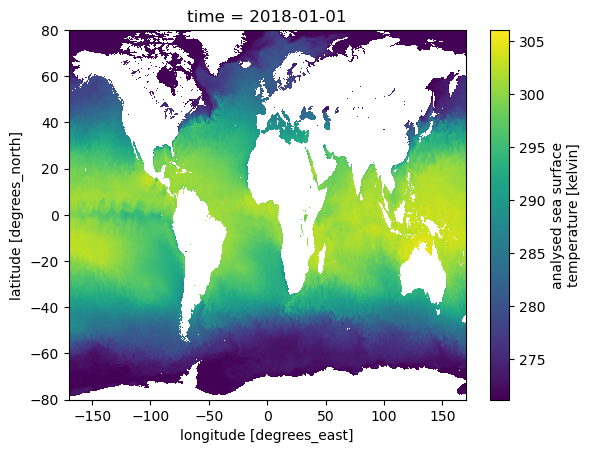

In [7]:
test_data.analysed_sst.isel(time=0).plot()

In [ ]:
# Define specific region

In [8]:
domain=[[20,40,-140,-105],[25,43,-82,-50],[25,45,140,170],[-50,-30,15,50]] # [Lat0,Lat1,Lon0,Lon1]
region=("California Current","Gulf Stream","Kuroshio Current","Agulhas Current")

In [ ]:
# Choosing region [ireg]

In [39]:
ireg=3
lat0=np.array(domain[ireg][0])
lat1=np.array(domain[ireg][1])
lon0=np.array(domain[ireg][2])
lon1=np.array(domain[ireg][3])

lat=test_data.latitude.isel()
lon=test_data.longitude.isel()

poslat=np.where((lat>=lat0) & (lat<=lat1))
poslon=np.where((lon>=lon0) & (lon<=lon1))


In [ ]:
# Define period of time [time]

In [44]:
jfm=range(0,90)
jas=range(180,273)

time=jas
sst=test_data['analysed_sst'][time,poslat[0],poslon[0]]-273.15 


In [ ]:
# Estimation mean and std

In [46]:
meanvar=np.nanmean(sst,axis=0)
stdvar=np.nanstd(sst,axis=0)

/tmp/ipykernel_2491/1948565740.py:1: RuntimeWarning: Mean of empty slice
  meanvar=np.nanmean(sst,axis=0)


(93, 400, 700)

In [ ]:
# FIGURE 

In [16]:
pip install cartopy cmocean 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:

import plotting_functions_obs as pf
import xarray as xr
import cmocean

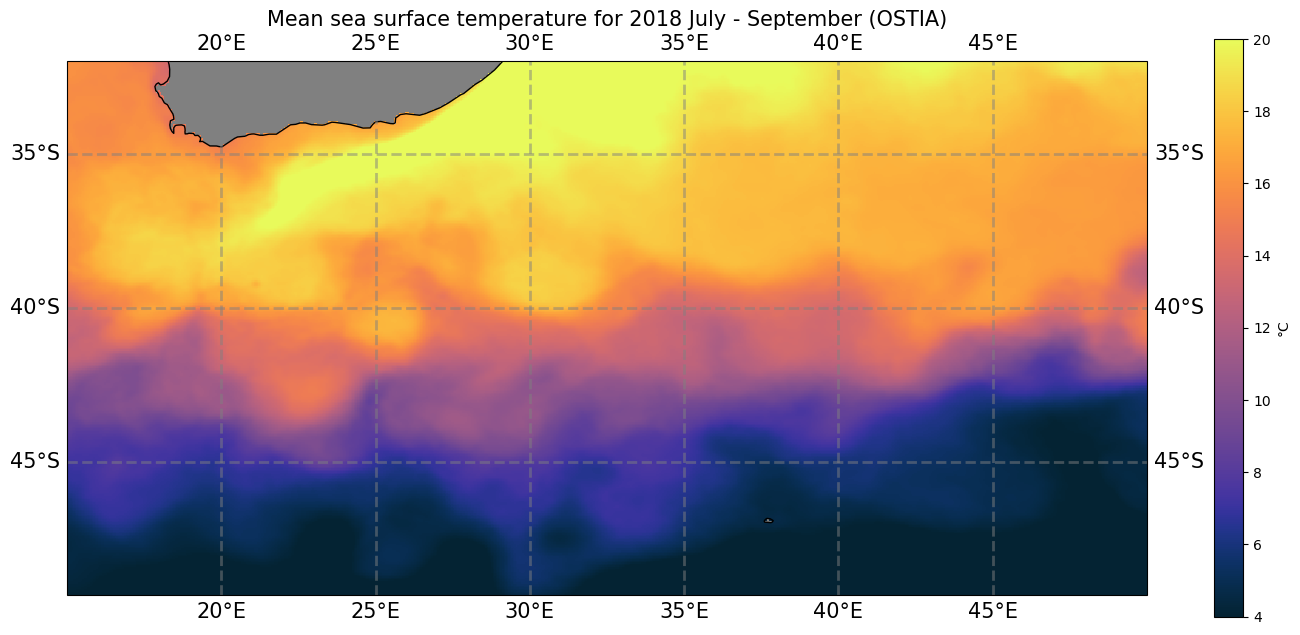

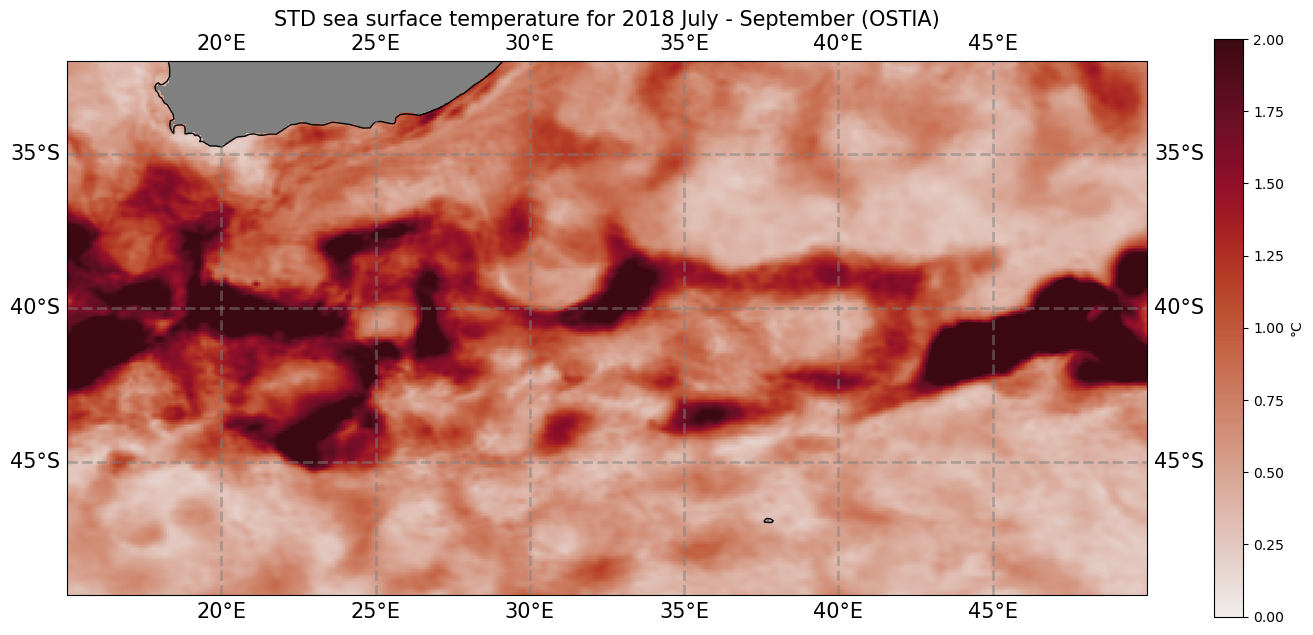

In [47]:
if ireg==0 and time==jfm:
    pf.map_mean_GS_obs(meanvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'Mean sea surface temperature for 2018 January - March (OSTIA)', '°C', 12, 22, cmocean.cm.thermal,"OSTIA_SST_CA_20180101-20180331.png")
    pf.map_mean_GS_obs(stdvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'STD sea surface temperature for 2018 January - March (OSTIA)', '°C', 0, 2, cmocean.cm.amp,"OSTIA_STD_SST_CA_20180101-20180331.png")
elif ireg==1 and time==jfm:
    pf.map_mean_GS_obs(meanvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'Mean sea surface temperature for 2018 January - March (OSTIA)', '°C', 12, 25, cmocean.cm.thermal,"OSTIA_SST_GS_20180101-20180331.png")
    pf.map_mean_GS_obs(stdvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'STD sea surface temperature for 2018 January - March (OSTIA)', '°C', 0, 3, cmocean.cm.amp,"OSTIA_STD_SST_GS_20180101-20180331.png")
elif ireg==2 and time==jfm:
    pf.map_mean_GS_obs(meanvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'Mean sea surface temperature for 2018 January - March', '°C', 5, 22, cmocean.cm.thermal,"OSTIA_SST_KU_20180101-20180331.png")
    pf.map_mean_GS_obs(stdvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'STD sea surface temperature for 2018 January - March (OSTIA)', '°C', 0, 2, cmocean.cm.amp,"OSTIA_STD_SST_KU_20180101-20180331.png")
elif ireg==3 and time==jas:
    pf.map_mean_GS_obs(meanvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'Mean sea surface temperature for 2018 July - September (OSTIA)', '°C', 4, 20, cmocean.cm.thermal,"OSTIA_SST_AG_20180701-20180930.png")
    pf.map_mean_GS_obs(stdvar,lon[poslon[0]],lat[poslat[0]],domain[ireg],'STD sea surface temperature for 2018 July - September (OSTIA)', '°C', 0, 2, cmocean.cm.amp,"OSTIA_STD_SST_AG_20180701-20180930.png")

